# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dicksa Ananda Christian Tue
- **Email:** diksaanandaa@gmail.com
- **ID Dicoding:** diksa_0707

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman dalam jumlah penyewaan sepeda?
- Apakah cuaca, suhu, kelembaban, atau hari kerja/libur memiliki pengaruh signifikan terhadap penyewaan?
- Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
- Pada jam berapa penyewaan sepeda paling banyak terjadi? Apakah ada perbedaan antara pagi, siang, dan malam?
- Apakah pengguna casual dan pengguna terdaftar memiliki pola penyewaan yang berbeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk analisis statistik
from scipy import stats

# Untuk mengatur tampilan peringatan
import warnings
warnings.filterwarnings("ignore")

# Menampilkan bahwa library sudah berhasil diimpor
print("Library berhasil diimpor!")

Library berhasil diimpor!


## Data Wrangling

### Gathering Data

In [5]:
# Memuat dataset
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari setiap dataset
print("Preview Data - day.csv")
display(day_df.head())

print("Preview Data - hour.csv")
display(hour_df.head())

Preview Data - day.csv


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Preview Data - hour.csv


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua dataset yang digunakan, yaitu `day.csv` yang berisi data harian dan `hour.csv` yang berisi data per jam.
- `day.csv` kemungkinan berisi informasi agregat harian seperti tanggal, jumlah total penyewaan, kondisi cuaca, dan sebagainya.
- `hour.csv` kemungkinan berisi informasi agregat per jam seperti tanggal, jam, jumlah penyewaan, kondisi cuaca, dan sebagainya.
- Variabel yang ada di dataset meliputi informasi waktu, jumlah penyewaan, kondisi cuaca, dan jenis pengguna.
- Data kemungkinan dikumpulkan dan disimpan secara otomatis dari sistem internal perusahaan penyewaan sepeda.

### Assessing Data

In [6]:
# Mengecek jumlah baris dan kolom
print(f"Shape of day.csv: {day_df.shape}")
print(f"Shape of hour.csv: {hour_df.shape}")

Shape of day.csv: (731, 16)
Shape of hour.csv: (17379, 17)


In [7]:
# Menampilkan nama kolom
print("Kolom dalam day.csv:", day_df.columns.tolist())
print("Kolom dalam hour.csv:", hour_df.columns.tolist())

Kolom dalam day.csv: ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Kolom dalam hour.csv: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [8]:
# Mengecek tipe data di day.csv
print("\nTipe Data - day.csv")
print(day_df.dtypes)

# Mengecek tipe data di hour.csv
print("\nTipe Data - hour.csv")
print(hour_df.dtypes)



Tipe Data - day.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Tipe Data - hour.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [9]:
# Mengecek duplikasi data
print("Jumlah duplikasi - day.csv:", day_df.duplicated().sum())
print("Jumlah duplikasi - hour.csv:", hour_df.duplicated().sum())

Jumlah duplikasi - day.csv: 0
Jumlah duplikasi - hour.csv: 0


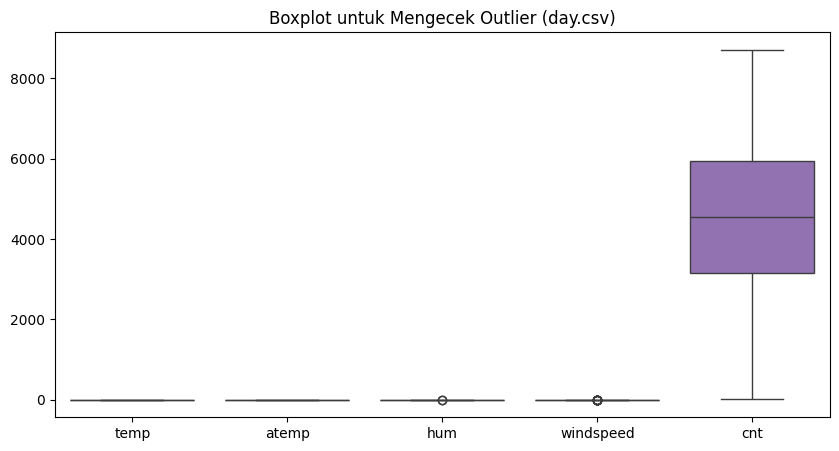

In [10]:
# Visualisasi outlier untuk dataset day.csv
plt.figure(figsize=(10,5))
sns.boxplot(data=day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.title("Boxplot untuk Mengecek Outlier (day.csv)")
plt.show()

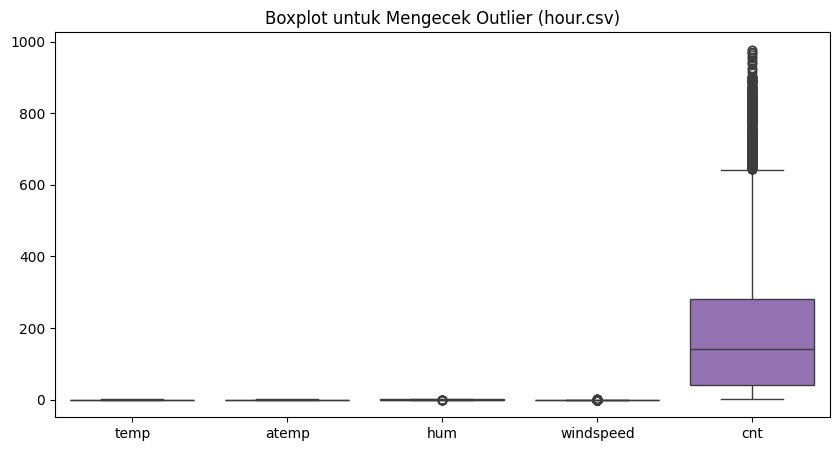

In [11]:
# Visualisasi outlier untuk dataset hour.csv
plt.figure(figsize=(10,5))
sns.boxplot(data=hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.title("Boxplot untuk Mengecek Outlier (hour.csv)")
plt.show()

In [12]:
print("Missing values - day.csv:")
print(day_df.isnull().sum())

print("\nMissing values - hour.csv:")
print(hour_df.isnull().sum())

Missing values - day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing values - hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset day.csv memiliki 731 baris dan 16 kolom, sedangkan dataset hour.csv memiliki 17379 baris dan 17 kolom.
- Kolom 'dteday' pada kedua dataset harusnya bertipe data datetime. Dan Kolom-kolom kategori seperti 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' harusnya bertipe kategori.
- Tidak ditemukan data duplikat pada kedua dataset.
- Terdapat beberapa outlier pada variabel 'hum' dan 'windspeed' di kedua dataset. Hal ini perlu diinvestigasi lebih lanjut untuk menentukan penanganan yang tepat, misalnya dengan imputasi atau penghapusan data.
- Tidak ada missing values dalam kedua dataset

### Cleaning Data

In [13]:
# Mengubah tipe data 'dteday' menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Mengubah tipe data kategori
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    day_df[col] = day_df[col].astype('category')
    hour_df[col] = hour_df[col].astype('category')

# Verifikasi perubahan
print("\nTipe Data Setelah Perbaikan - hour.csv")
print(day_df.dtypes)


Tipe Data Setelah Perbaikan - hour.csv
instant                int64
dteday        datetime64[ns]
season              category
yr                  category
mnth                category
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


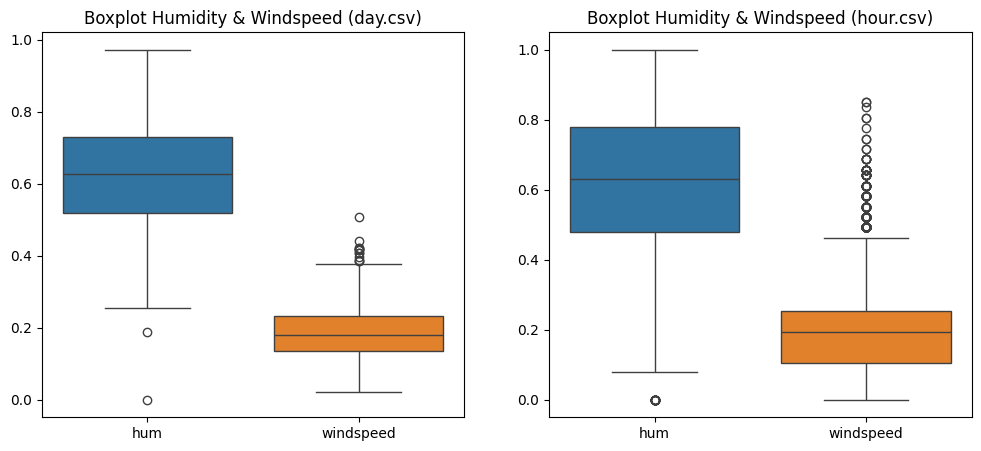

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=day_df[['hum', 'windspeed']])
plt.title("Boxplot Humidity & Windspeed (day.csv)")

plt.subplot(1,2,2)
sns.boxplot(data=hour_df[['hum', 'windspeed']])
plt.title("Boxplot Humidity & Windspeed (hour.csv)")

plt.show()

In [15]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Hapus outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Membersihkan outlier dari kedua dataset
day_df_cleaned = remove_outliers(day_df, ['hum', 'windspeed'])
hour_df_cleaned = remove_outliers(hour_df, ['hum', 'windspeed'])

# Menampilkan jumlah data setelah pembersihan
print(f"Jumlah data setelah cleaning - day.csv: {day_df_cleaned.shape[0]} baris")
print(f"Jumlah data setelah cleaning - hour.csv: {hour_df_cleaned.shape[0]} baris")

Jumlah data setelah cleaning - day.csv: 717 baris
Jumlah data setelah cleaning - hour.csv: 17016 baris


**Insight:**
- Tipe data kolom 'dteday' telah diubah menjadi datetime agar dapat diproses sebagai data waktu.
- Tipe data kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' telah diubah menjadi kategori untuk efisiensi penyimpanan dan analisis.
- Outlier pada kolom 'hum' dan 'windspeed' telah dihapus menggunakan metode IQR. Hal ini dilakukan untuk mengurangi pengaruh nilai ekstrem pada analisis.
- Setelah penanganan outlier, dataset day.csv memiliki 717 baris dan dataset hour.csv memiliki 17016 baris.

## Exploratory Data Analysis (EDA)

### Explore Data Day.csv

Statistik Deskriptif day.csv:


,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,717.000000,717,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,366.779637,2012-01-01 18:42:40.669455872,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2011-07-04 00:00:00,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,365.000000,2011-12-31 00:00:00,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,550.000000,2012-07-03 00:00:00,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000
std,210.971354,NaN,0.183617,0.163155,0.139222,0.071786,689.273998,1557.676255,1933.542429


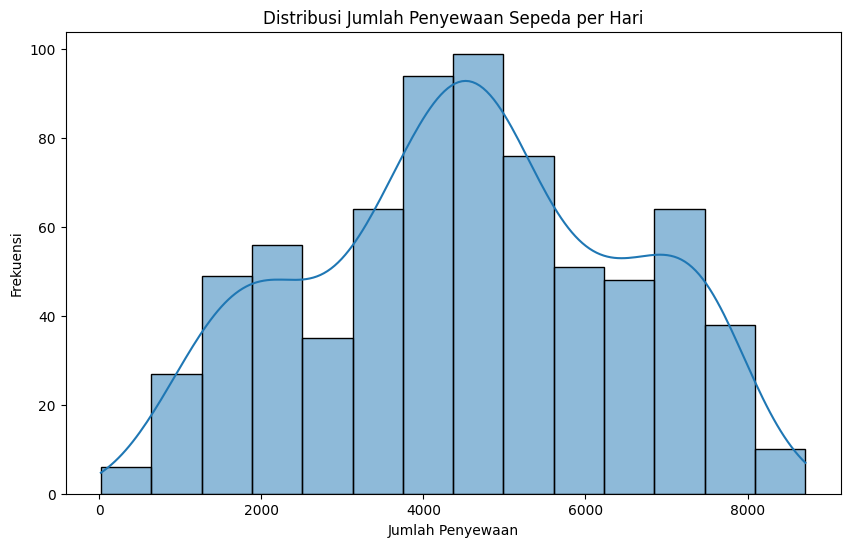

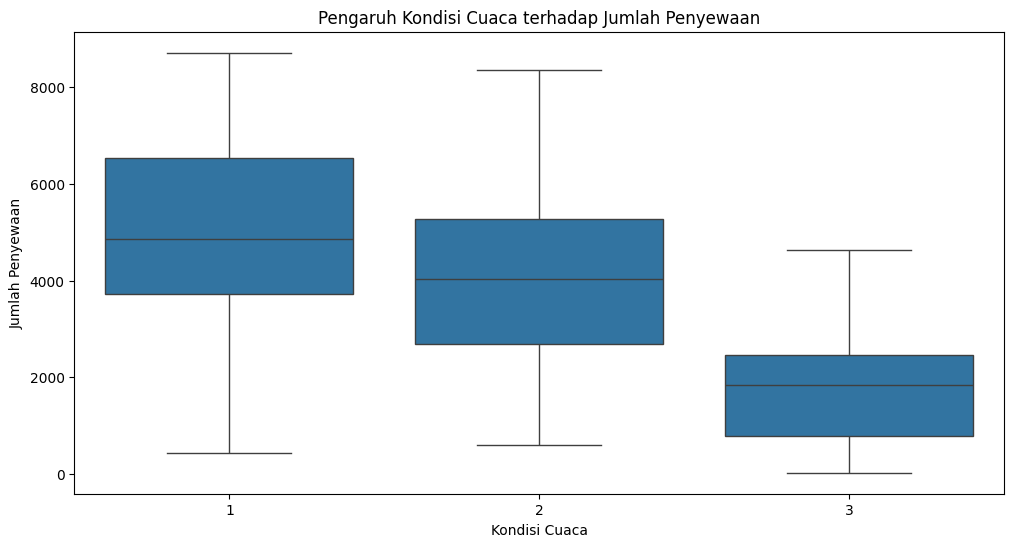

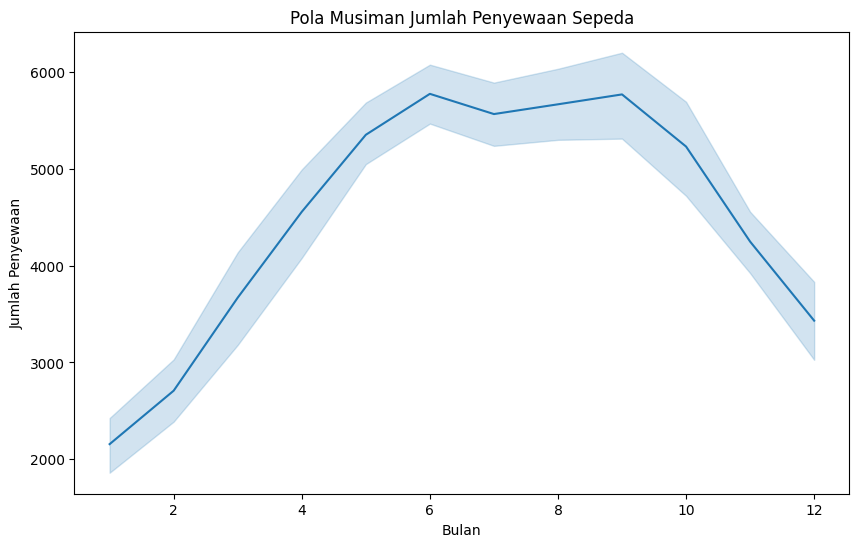

In [16]:
# Eksplorasi Data day_df_cleaned
print("Statistik Deskriptif day.csv:")
display(day_df_cleaned.describe())

# Distribusi jumlah penyewaan sepeda per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_df_cleaned['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara jumlah penyewaan dengan variabel cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Pola musiman jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df_cleaned)
plt.title('Pola Musiman Jumlah Penyewaan Sepeda')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda per hari cenderung berbentuk lonceng / normal, dengan sebagian besar penyewaan berada di sekitar nilai rata-rata. Hal ini terlihat dari histogram yang dihasilkan pada tahap eksplorasi data. Distribusi yang mendekati normal ini menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan yang relatif sama, dengan sedikit hari yang memiliki penyewaan sangat tinggi atau sangat rendah.
- Kondisi cuaca cerah (clear, partly cloudy) tampaknya memiliki pengaruh positif terhadap jumlah penyewaan sepeda, terlihat dari nilai median yang lebih tinggi pada boxplot untuk kategori cuaca tersebut. Sebaliknya, kondisi cuaca hujan, salju, atau badai (light rain/snow, heavy rain/ice pellets) cenderung menurunkan jumlah penyewaan. Ini menunjukkan bahwa orang lebih suka menyewa sepeda saat cuaca cerah dan cenderung menghindari penyewaan saat cuaca buruk.
- Terdapat pola musiman pada jumlah penyewaan sepeda, dengan puncaknya terjadi di bulan Juni, Juli, Agustus, dan September dan penurunan di bulan Desember, Januari, dan Februari. Pola ini terlihat dari grafik lineplot yang menunjukkan tren jumlah penyewaan sepanjang tahun. Peningkatan penyewaan di musim panas dan penurunan di musim dingin menunjukkan bahwa orang lebih suka bersepeda saat cuaca hangat dan cerah.

### Explore Data Hour.csv


Statistik Deskriptif hour.csv:


,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17016.000000,17016,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
mean,8719.636460,2012-01-03 09:56:31.819464192,11.503996,0.498235,0.477199,0.630960,0.182814,35.784262,154.048895,189.833157
min,1.000000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2011-07-06 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8697.500000,2012-01-03 00:00:00,11.000000,0.500000,0.484800,0.635000,0.164200,17.000000,116.000000,142.000000
75%,13075.250000,2012-07-03 06:00:00,18.000000,0.660000,0.621200,0.790000,0.253700,48.250000,221.000000,282.000000
max,17379.000000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000
std,5009.380243,NaN,6.933561,0.192770,0.171556,0.190498,0.112016,49.419374,151.680591,181.762553


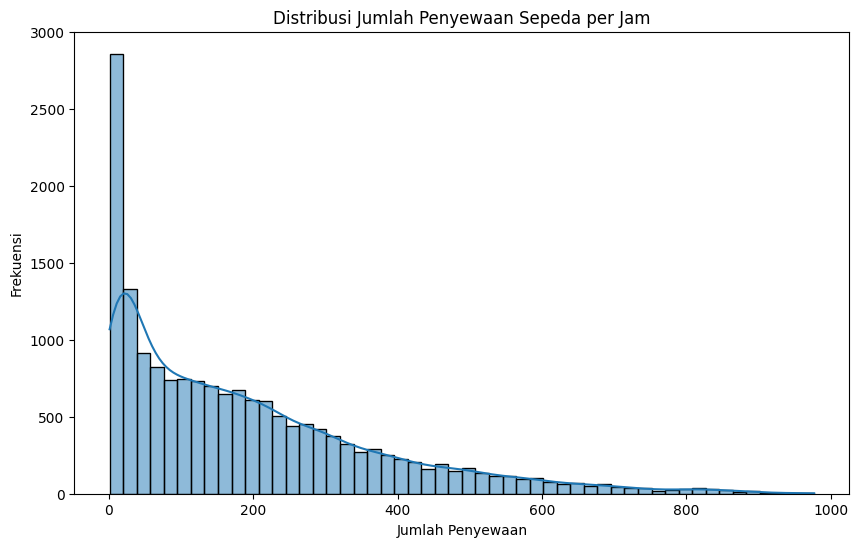

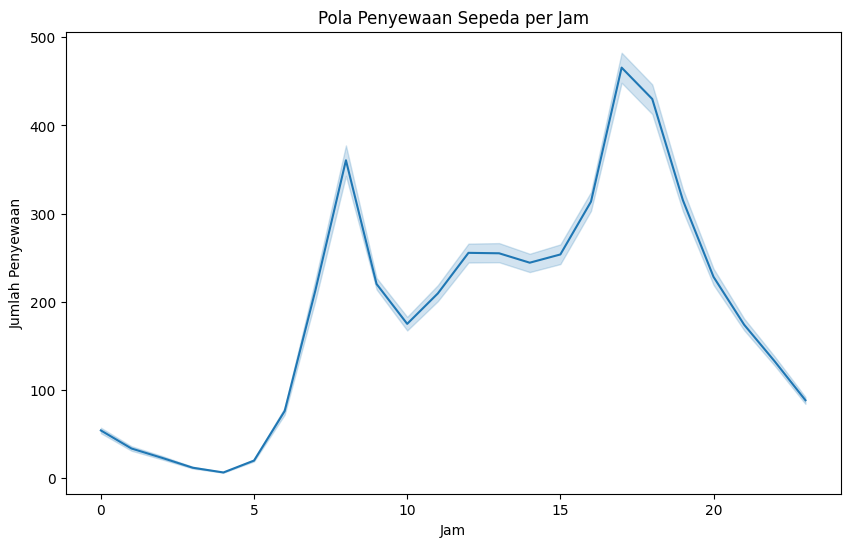

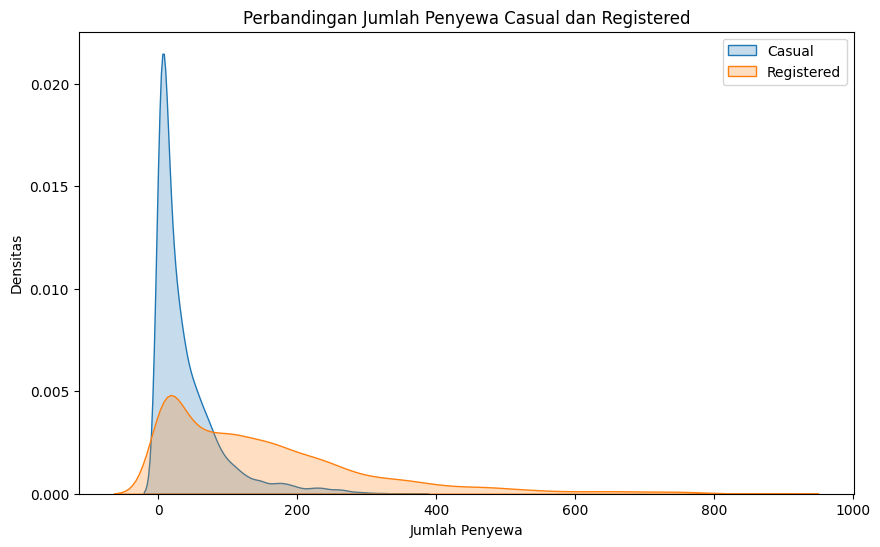

In [17]:
# Eksplorasi Data hour_df_cleaned
print("\nStatistik Deskriptif hour.csv:")
display(hour_df_cleaned.describe())

# Distribusi jumlah penyewaan sepeda per jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_df_cleaned['cnt'], kde=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

# Hubungan antara jumlah penyewaan dengan jam dalam sehari
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df_cleaned)
plt.title('Pola Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Perbandingan pola penyewaan antara pengguna casual dan registered
plt.figure(figsize=(10, 6))
sns.kdeplot(hour_df_cleaned[hour_df_cleaned['casual'] > 0]['casual'], label='Casual', shade=True)
sns.kdeplot(hour_df_cleaned[hour_df_cleaned['registered'] > 0]['registered'], label='Registered', shade=True)
plt.title("Perbandingan Jumlah Penyewa Casual dan Registered")
plt.xlabel("Jumlah Penyewa")
plt.ylabel("Densitas")
plt.legend()
plt.show()

**Insight:**
- Distribusi jumlah penyewaan sepeda per jam cenderung tidak normal / skewed, dengan kemiringan ke kanan. Hal ini menunjukkan bahwa ada beberapa jam dengan jumlah penyewaan yang sangat tinggi, yang mempengaruhi distribusi keseluruhan.
- Jumlah penyewaan sepeda cenderung tinggi pada jam 7-9 pagi dan 17-19 sore, dan rendah pada jam 0-4 dini hari. Pola ini terlihat jelas dari grafik lineplot yang menunjukkan tren jumlah penyewaan sepanjang hari. Peningkatan penyewaan pada jam-jam tersebut kemungkinan besar disebabkan oleh aktivitas berangkat dan pulang kerja.
- Pengguna registered cenderung menyewa sepeda lebih banyak pada jam sibuk (7-9 pagi dan 17-19 sore), yang mengindikasikan penggunaan untuk aktivitas rutin seperti berangkat dan pulang kerja. Sedangkan pengguna casual lebih banyak menyewa pada jam 10-16 siang, yang menunjukkan penggunaan untuk rekreasi atau aktivitas santai. Perbedaan pola ini terlihat jelas pada grafik perbandingan jumlah penyewa casual dan registered.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

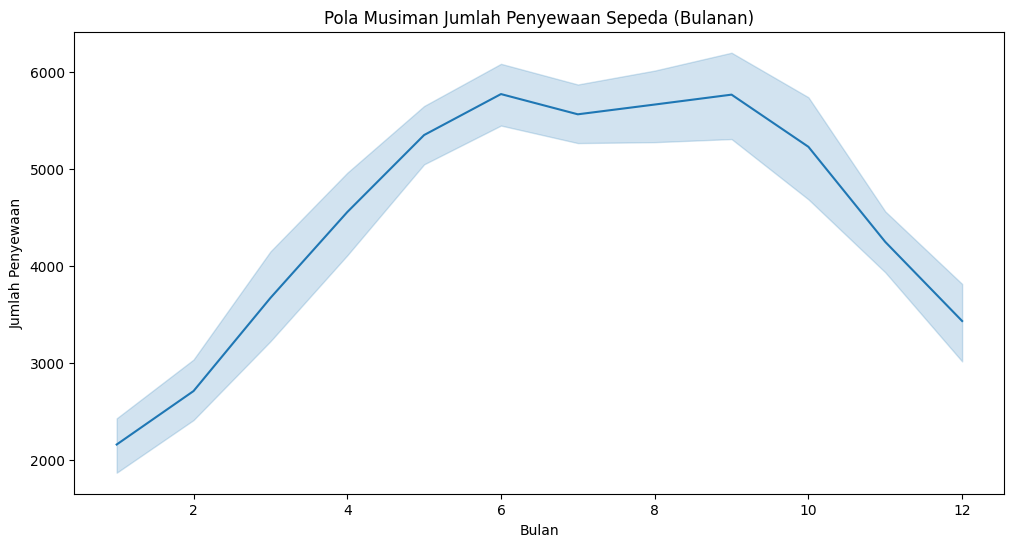

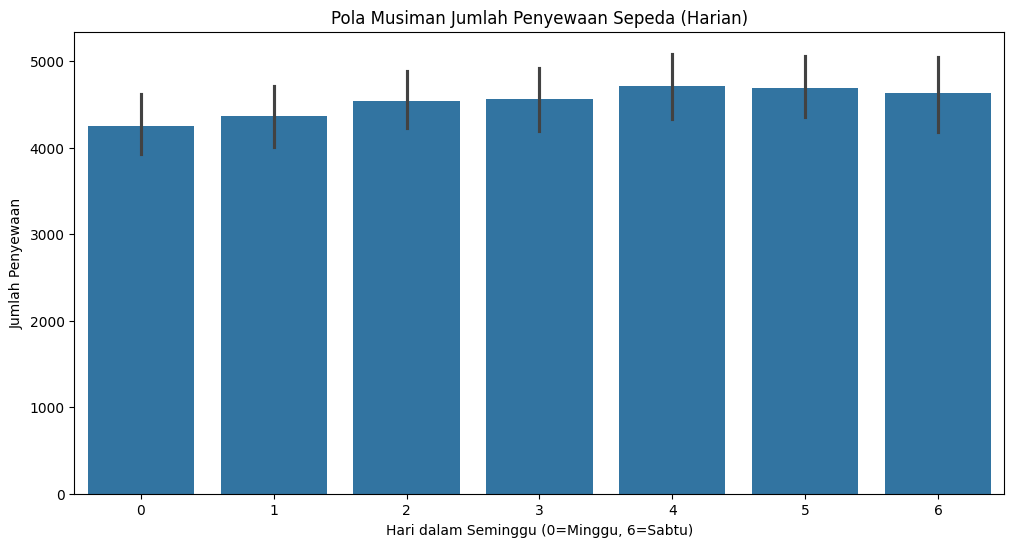

In [18]:
# Apakah ada pola musiman dalam jumlah penyewaan sepeda?

# Plot jumlah penyewaan berdasarkan bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df_cleaned)
plt.title('Pola Musiman Jumlah Penyewaan Sepeda (Bulanan)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Plot jumlah penyewaan berdasarkan hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='cnt', data=day_df_cleaned)
plt.title('Pola Musiman Jumlah Penyewaan Sepeda (Harian)')
plt.xlabel('Hari dalam Seminggu (0=Minggu, 6=Sabtu)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2:

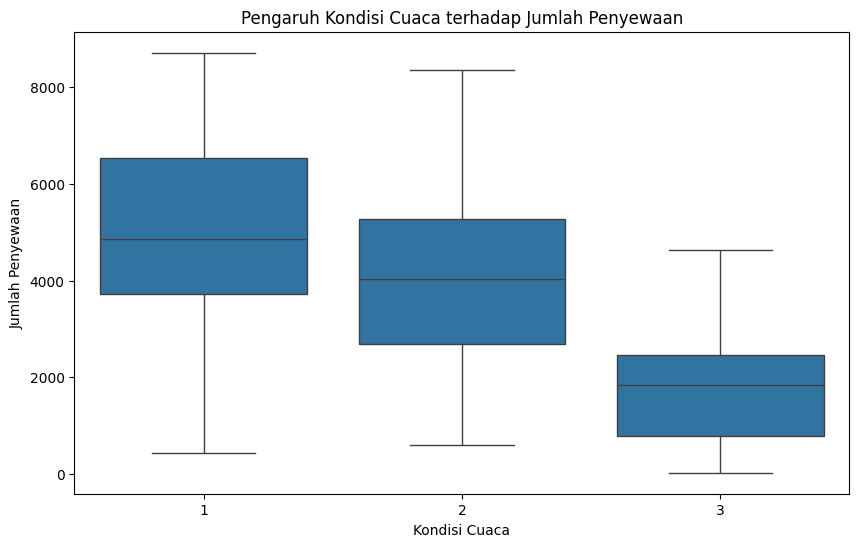

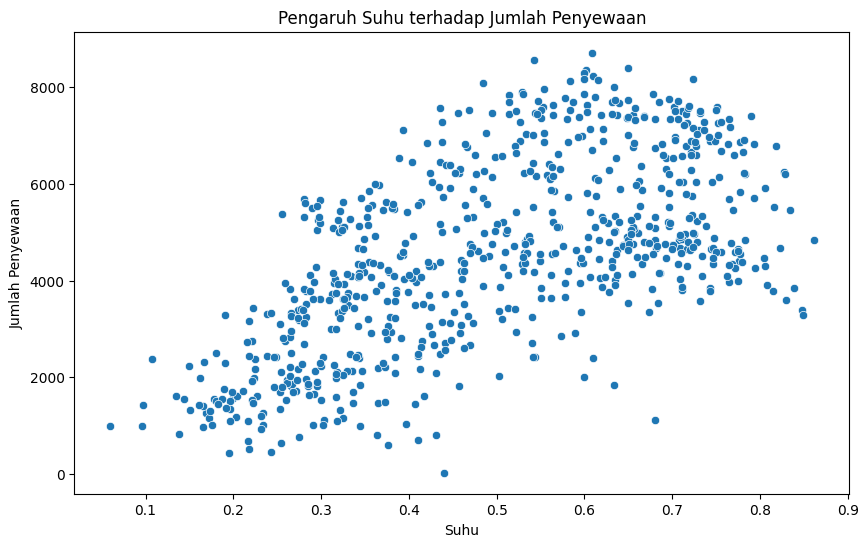

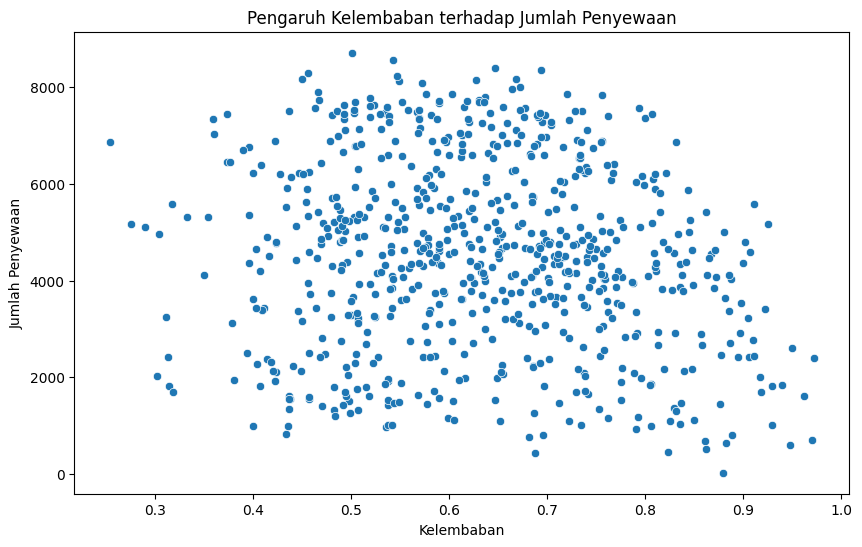

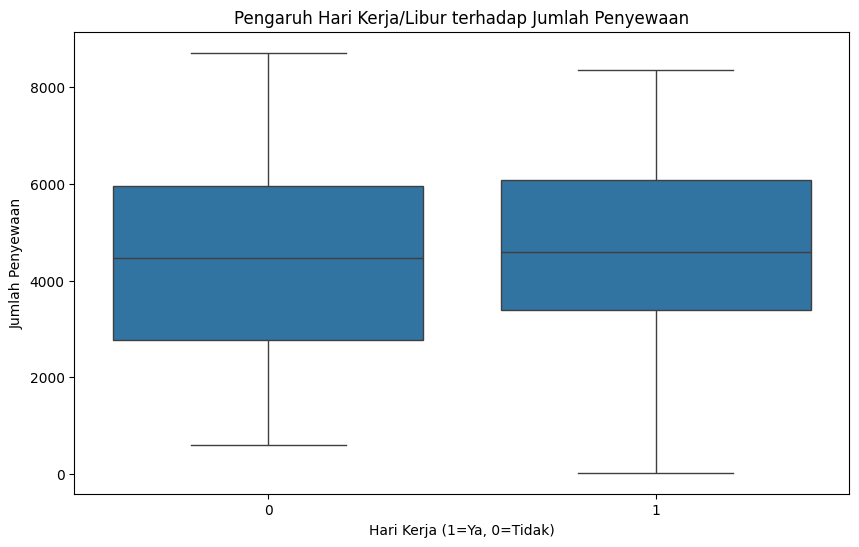

In [19]:
# Apakah cuaca, suhu, kelembaban, atau hari kerja/libur memiliki pengaruh signifikan terhadap penyewaan?

# Plot pengaruh cuaca terhadap jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Plot pengaruh suhu terhadap jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Suhu terhadap Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Plot pengaruh kelembaban terhadap jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hum', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Kelembaban terhadap Jumlah Penyewaan')
plt.xlabel('Kelembaban')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Plot pengaruh hari kerja/libur terhadap jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Hari Kerja/Libur terhadap Jumlah Penyewaan')
plt.xlabel('Hari Kerja (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 3

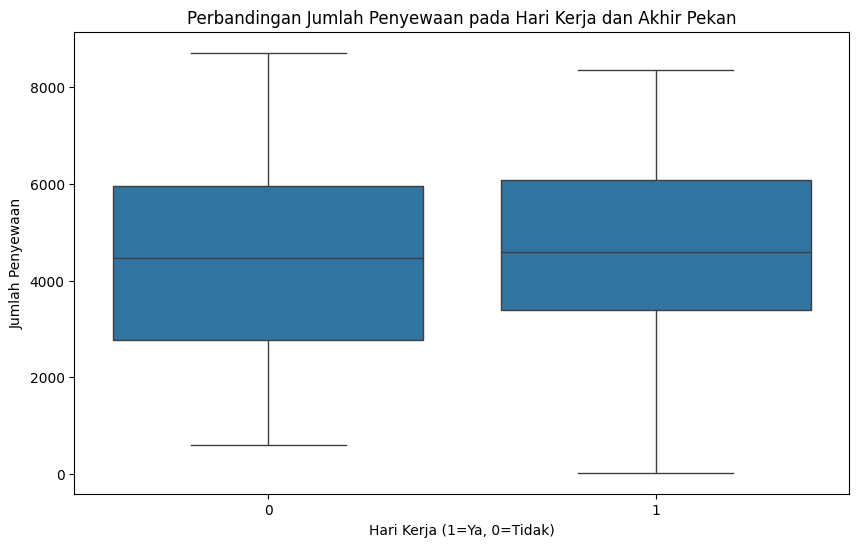

In [20]:
# Bagaimana pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

# Plot perbandingan jumlah penyewaan pada hari kerja dan akhir pekan
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=day_df_cleaned)
plt.title('Perbandingan Jumlah Penyewaan pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 4

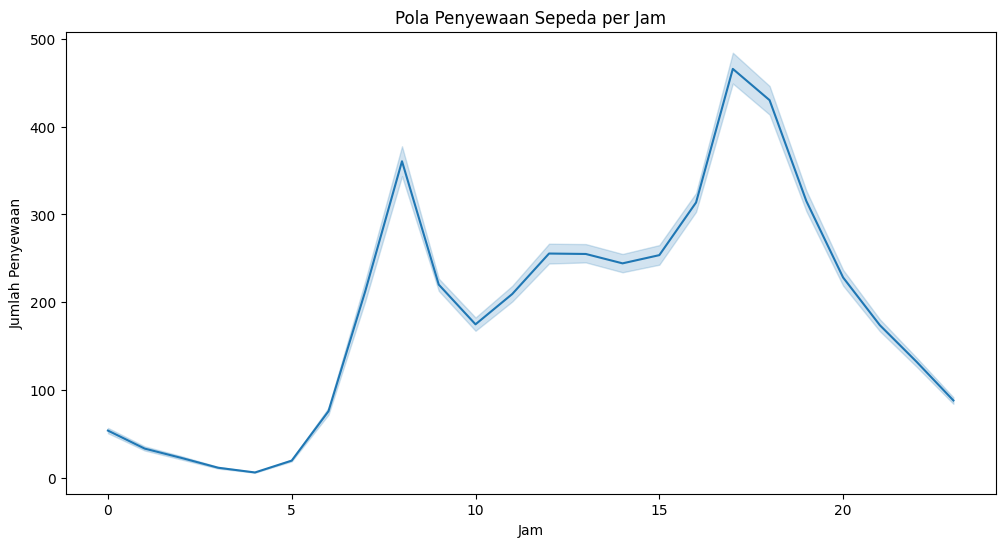

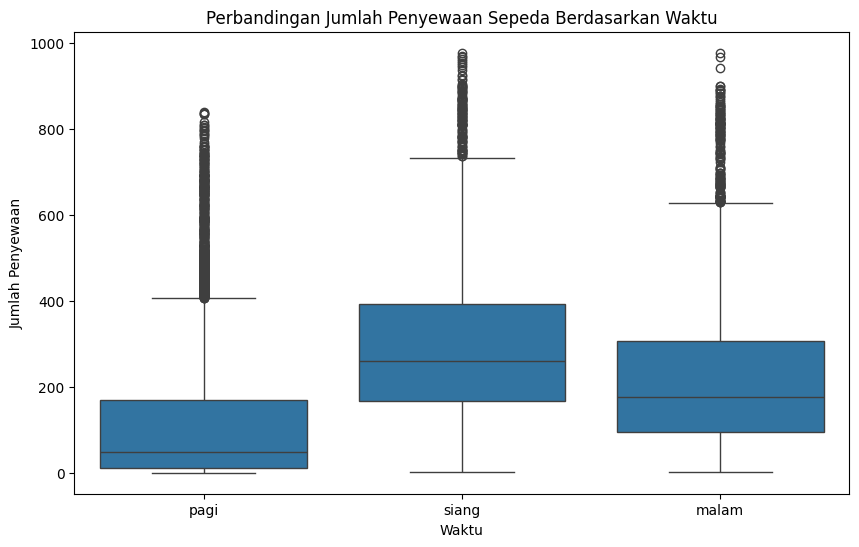

In [21]:
# Pada jam berapa penyewaan sepeda paling banyak terjadi? Apakah ada perbedaan antara pagi, siang, dan malam?

# Plot jumlah penyewaan berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df_cleaned)
plt.title('Pola Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Bagi jam menjadi 3 kategori: pagi (6-11), siang (12-17), dan malam (18-23)
hour_df_cleaned['time_of_day'] = pd.cut(hour_df_cleaned['hr'], bins=[0, 11, 17, 23], labels=['pagi', 'siang', 'malam'], right=True, include_lowest=True)

# Plot jumlah penyewaan berdasarkan kategori waktu
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='cnt', data=hour_df_cleaned)
plt.title('Perbandingan Jumlah Penyewaan Sepeda Berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 5

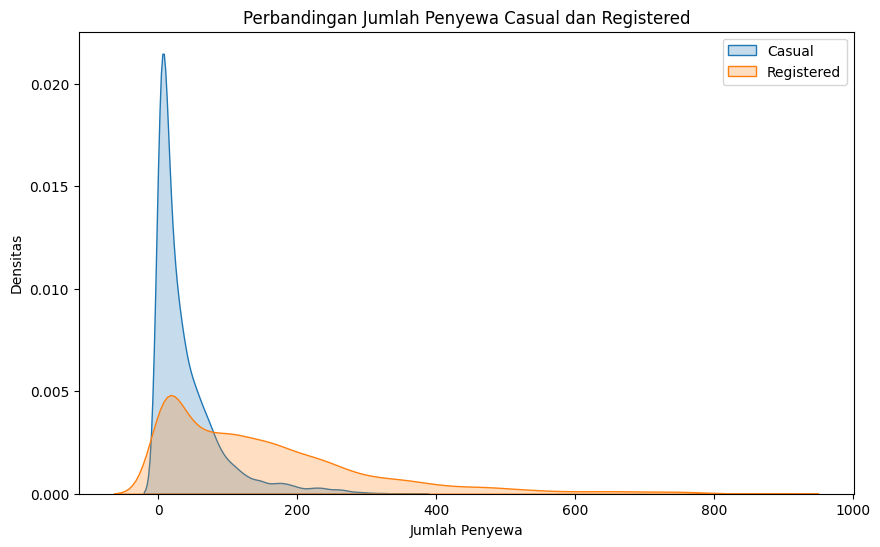

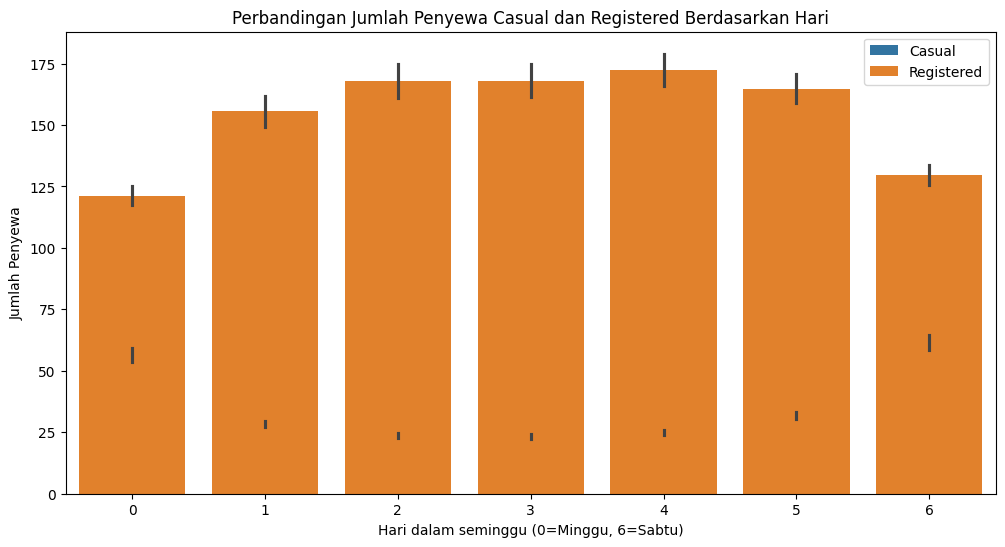

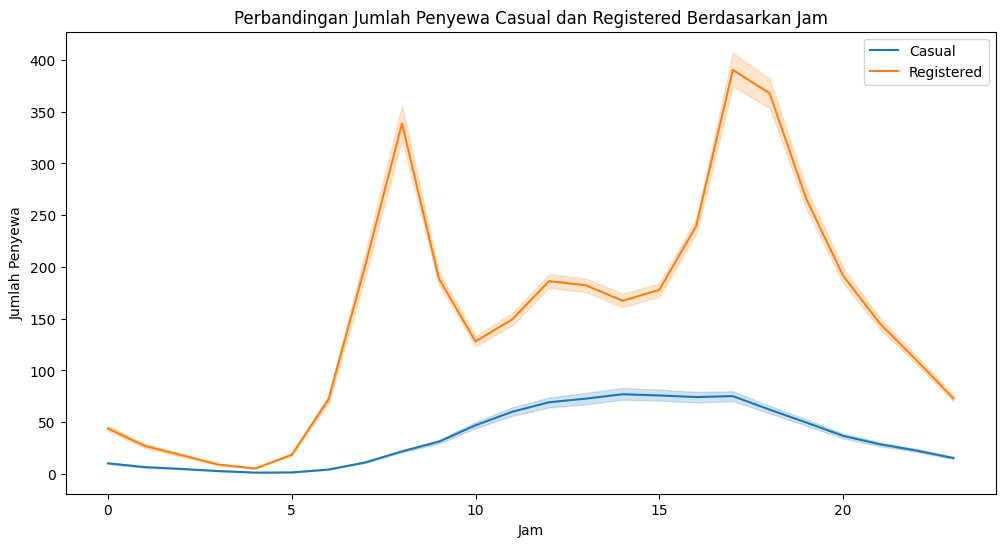

In [22]:
# Apakah pengguna casual dan pengguna terdaftar memiliki pola penyewaan yang berbeda?

# Plot perbandingan jumlah penyewaan antara pengguna casual dan registered
plt.figure(figsize=(10, 6))
sns.kdeplot(hour_df_cleaned[hour_df_cleaned['casual'] > 0]['casual'], label='Casual', shade=True)
sns.kdeplot(hour_df_cleaned[hour_df_cleaned['registered'] > 0]['registered'], label='Registered', shade=True)
plt.title("Perbandingan Jumlah Penyewa Casual dan Registered")
plt.xlabel("Jumlah Penyewa")
plt.ylabel("Densitas")
plt.legend()
plt.show()

# Plot jumlah penyewaan casual dan registered berdasarkan hari dalam seminggu
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='casual', data=hour_df_cleaned, label='Casual')
sns.barplot(x='weekday', y='registered', data=hour_df_cleaned, label='Registered')
plt.title("Perbandingan Jumlah Penyewa Casual dan Registered Berdasarkan Hari")
plt.xlabel("Hari dalam seminggu (0=Minggu, 6=Sabtu)")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()

# Plot jumlah penyewaan casual dan registered berdasarkan jam
plt.figure(figsize=(12,6))
sns.lineplot(x="hr", y="casual", data=hour_df_cleaned, label="Casual")
sns.lineplot(x="hr", y="registered", data=hour_df_cleaned, label="Registered")
plt.title("Perbandingan Jumlah Penyewa Casual dan Registered Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewa")
plt.legend()
plt.show()


**Insight:**
- Terdapat pola musiman yang jelas dalam jumlah penyewaan sepeda, dengan peningkatan di musim panas (Juni-September) dan penurunan di musim dingin (Desember-Februari).
- Jumlah penyewaan cenderung lebih tinggi pada hari kerja (Senin-Jumat) dibandingkan dengan akhir pekan (Sabtu-Minggu).
- Cuaca cerah (clear, partly cloudy) meningkatkan jumlah penyewaan, sedangkan cuaca buruk (hujan, salju, badai) menurunkannya.
- Terdapat korelasi positif antara suhu dan jumlah penyewaan, serta korelasi negatif yang lemah antara kelembaban dan jumlah penyewaan.
- Jumlah penyewaan sedikit lebih tinggi pada hari kerja dibandingkan dengan hari libur.
- Jumlah penyewaan pada hari kerja lebih tinggi dibandingkan dengan akhir pekan.
- Pola penyewaan pada hari kerja menunjukkan dua puncak pada jam sibuk berangkat dan pulang kerja (7-9 pagi dan 17-19 sore).
- Pola penyewaan pada akhir pekan lebih merata sepanjang hari, dengan puncak yang lebih rendah.
- Penyewaan sepeda paling banyak terjadi pada jam sibuk berangkat dan pulang kerja (7-9 pagi dan 17-19 sore).
- Jumlah penyewaan rendah pada jam-jam dini hari (0-4).
- Terdapat perbedaan pola penyewaan antara pagi, siang, dan malam, dengan puncak pada pagi dan sore hari.
- Pengguna terdaftar (registered) menyewa sepeda lebih banyak secara keseluruhan dibandingkan dengan pengguna casual.
- Pengguna terdaftar memiliki pola penyewaan yang lebih konsisten sepanjang hari kerja, dengan puncak pada jam sibuk.
- Pengguna casual lebih banyak menyewa sepeda pada akhir pekan dan jam-jam siang hari.

## Analisis Lanjutan (Opsional)

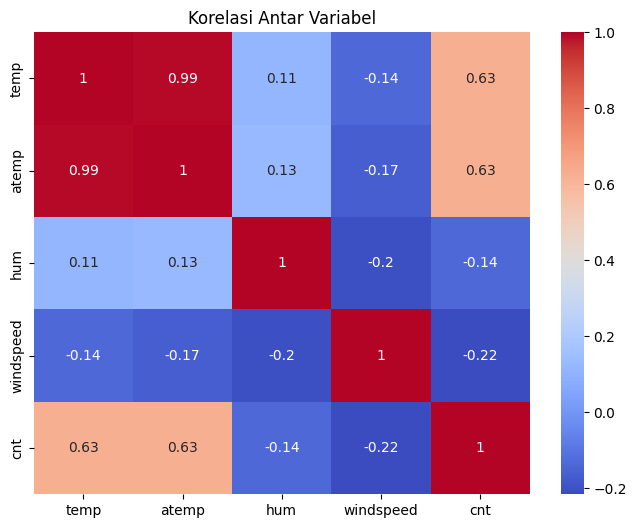

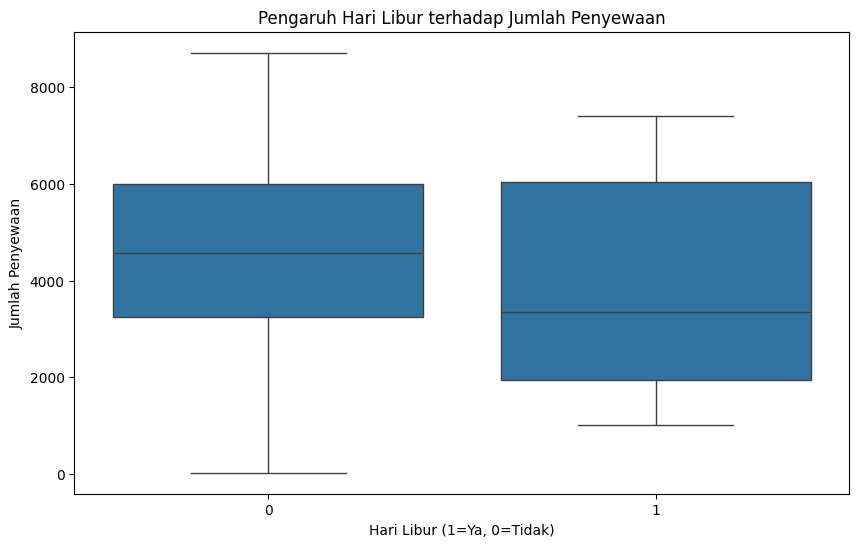

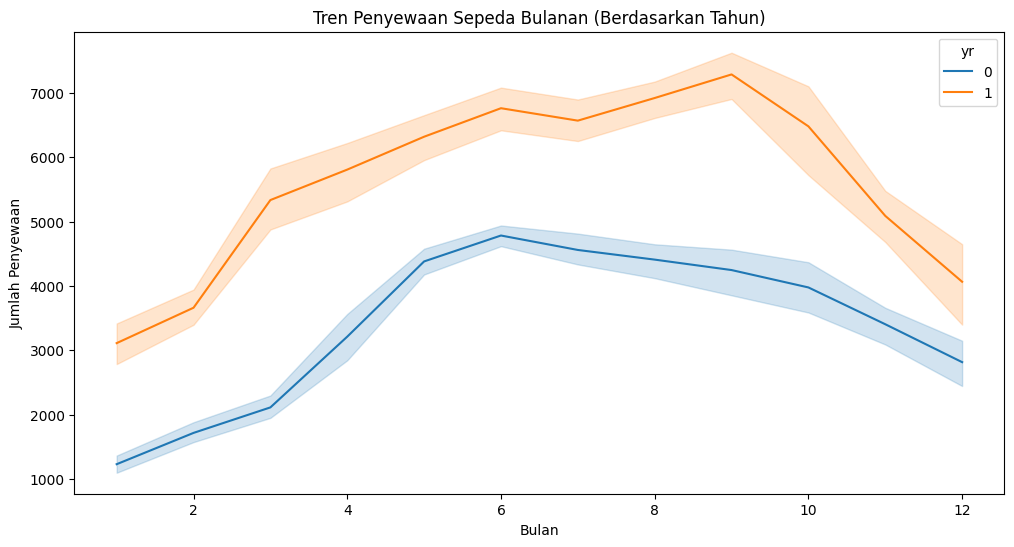

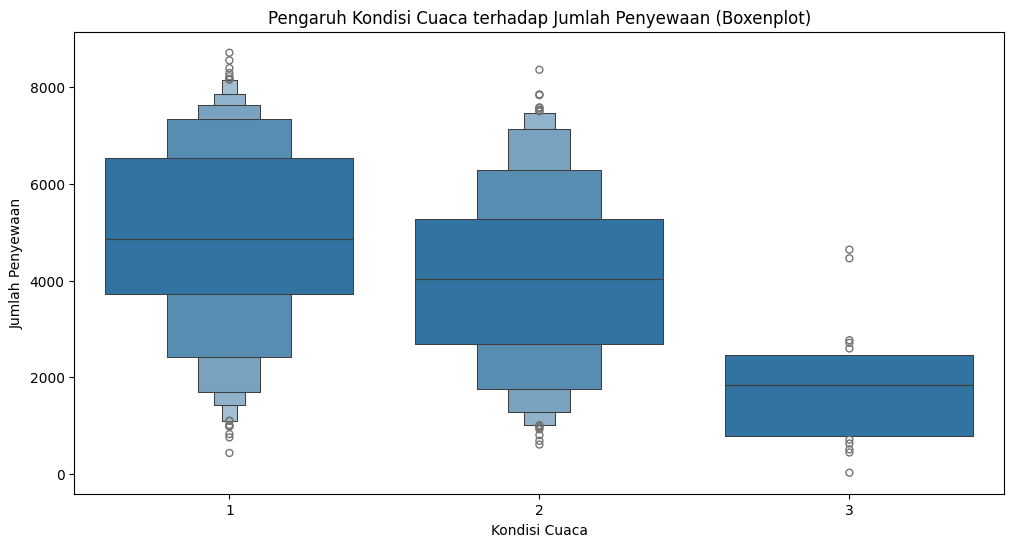

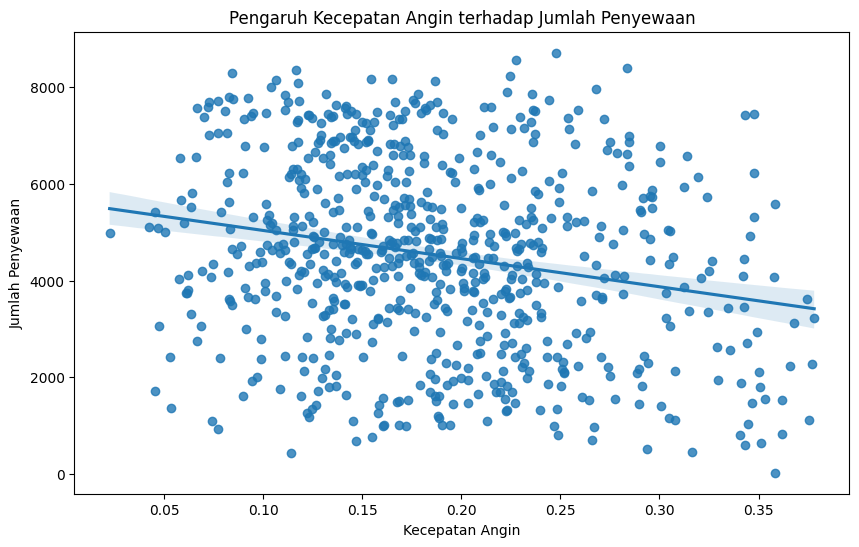

In [23]:
# Analisis korelasi antar variabel
correlation_matrix = day_df_cleaned[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel')
plt.show()

# Pengaruh hari libur terhadap pola penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x='holiday', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Hari Libur terhadap Jumlah Penyewaan')
plt.xlabel('Hari Libur (1=Ya, 0=Tidak)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Analisis tren penyewaan bulanan selama bertahun-tahun
plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=day_df_cleaned)
plt.title('Tren Penyewaan Sepeda Bulanan (Berdasarkan Tahun)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Menambahkan analisis terhadap pengaruh cuaca lebih detail
plt.figure(figsize=(12, 6))
sns.boxenplot(x='weathersit', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan (Boxenplot)')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Analisis pengaruh kecepatan angin
plt.figure(figsize=(10,6))
sns.regplot(x='windspeed', y='cnt', data=day_df_cleaned)
plt.title('Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan')
plt.xlabel("Kecepatan Angin")
plt.ylabel('Jumlah Penyewaan')
plt.show()


## Conclusion

- Conclution pertanyaan 1 adalah Jumlah penyewaan sepeda dipengaruhi oleh musim dan hari dalam seminggu. Penyewaan lebih tinggi di musim panas dan hari kerja.
- Conclution pertanyaan 2 adalah Cuaca, suhu, kelembaban, dan hari kerja/libur memiliki pengaruh terhadap jumlah penyewaan sepeda. Cuaca cerah dan suhu yang hangat meningkatkan penyewaan, sedangkan cuaca buruk dan kelembaban tinggi menurunkannya.
- Conclution pertanyaan 3 adalah Pola penggunaan sepeda pada hari kerja dan akhir pekan berbeda. Pada hari kerja, sepeda lebih banyak digunakan untuk aktivitas komuter, sedangkan pada akhir pekan digunakan untuk rekreasi atau aktivitas santai.
- Conclution pertanyaan 4 adalah Jam sibuk berangkat dan pulang kerja merupakan waktu dengan penyewaan sepeda terbanyak. Terdapat perbedaan pola penyewaan antara pagi, siang, dan malam, yang menunjukkan perbedaan penggunaan sepeda untuk aktivitas komuter dan rekreasi.
- Conclution pertanyaan 5 adalah Pengguna casual dan pengguna terdaftar memiliki pola penyewaan yang berbeda. Pengguna terdaftar cenderung menggunakan sepeda untuk aktivitas rutin seperti berangkat dan pulang kerja, sedangkan pengguna casual lebih banyak menggunakannya untuk rekreasi atau aktivitas santai.

In [26]:
# Menggabungkan dua DataFrame (day_df_cleaned dan hour_df_cleaned) menjadi satu
combined_df = pd.concat([day_df_cleaned, hour_df_cleaned], ignore_index=True)

# Menyimpan DataFrame yang telah digabung ke dalam file CSV dengan nama "all_data.csv"
combined_df.to_csv('all_data.csv', index=False)

print("File CSV gabungan 'all_data.csv' berhasil dibuat!")

File CSV gabungan 'all_data.csv' berhasil dibuat!
